In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sns

### Analysing overall dataset

In [2]:
#importing the csv file for diabetic data

df = pd.read_csv('/Users/divyakhairnar/Documents/FDSA/courseProject/dataset_diabetes/diabetic_data.csv')

#displaying the first 5 rows of the dataset

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#as we cannot see all the column names in the above result of diabetic dataset, the column names are checked

print('The columns present in the dataset are:\n\n',df.columns)

The columns present in the dataset are:

 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [4]:
#describing the dataset

df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
#counting the number of rows and columns present in the dataset

rows = len(df) #no of rows
col = len(df.columns) #no of columns

print('The number of rows present are : ', rows)
print('The number of columns present are : ',col)

The number of rows present are :  101766
The number of columns present are :  50


In [6]:
#the main goal is to predict the readmissions, hence the class distribution of readmitted attribute is computed

readmitCount = df['readmitted'].value_counts()

print('The class distribution of readmitted attribute is:\n', readmitCount)

The class distribution of readmitted attribute is:
 NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


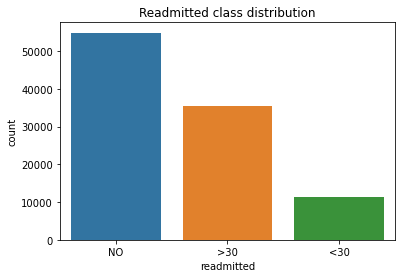

In [7]:
#plotting graph for class distribution of readmitted attribute

mplt.title('Readmitted class distribution')
barchart = sns.countplot(x = 'readmitted', data = df)
mplt.show()

<AxesSubplot:title={'center':'Correlation model'}>

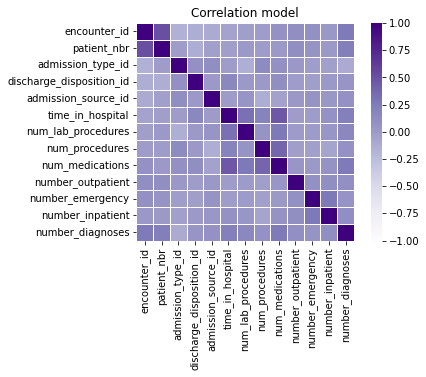

In [8]:
#plotting correlation model for the dataset

data_corr = df.corr()

mplt.title("Correlation model")
sns.heatmap(data_corr, vmin=-1, vmax=1, center=0, cmap="Purples", square = True, cbar = True, linewidths=0.5)

In [9]:
#checking if any missing values are present in the dataset

print('Number of missing data present in the dataset:')
print(df.isnull().sum())

Number of missing data present in the dataset:
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide              

In [10]:
'''The above output gives 0 as the null values are in the form of '?',
As the null values in this dataset are represented by ?, so the count of ? will be required to check 
the presence of null values, hence here we use the count function '''

print('The number of ? present in each column in the total dataset are:\n')

for i in df.columns:
    a = df[i][df[i] == '?'].count()
    print(i,':',a)

The number of ? present in each column in the total dataset are:

encounter_id : 0
patient_nbr : 0
race : 2273
gender : 0
age : 0
weight : 98569
admission_type_id : 0
discharge_disposition_id : 0
admission_source_id : 0
time_in_hospital : 0
payer_code : 40256
medical_specialty : 49949
num_lab_procedures : 0
num_procedures : 0
num_medications : 0
number_outpatient : 0
number_emergency : 0
number_inpatient : 0
diag_1 : 21
diag_2 : 358
diag_3 : 1423
number_diagnoses : 0
max_glu_serum : 0
A1Cresult : 0
metformin : 0
repaglinide : 0
nateglinide : 0
chlorpropamide : 0
glimepiride : 0
acetohexamide : 0
glipizide : 0
glyburide : 0
tolbutamide : 0
pioglitazone : 0
rosiglitazone : 0
acarbose : 0
miglitol : 0
troglitazone : 0
tolazamide : 0
examide : 0
citoglipton : 0
insulin : 0
glyburide-metformin : 0
glipizide-metformin : 0
glimepiride-pioglitazone : 0
metformin-rosiglitazone : 0
metformin-pioglitazone : 0
change : 0
diabetesMed : 0
readmitted : 0


### Analyzing given train dataset

In [11]:
#importing the given training dataset

trainData = pd.read_csv('/Users/divyakhairnar/Documents/FDSA/courseProject/dataset_diabetes/diabetic_data_train.csv')

#displaying first 5 rows of trainData
trainData.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,93634,338369606,159605546,AfricanAmerican,Male,[70-80),?,1,23,7,...,No,No,No,No,No,No,No,No,No,NO
1,27698,90739116,83232054,Caucasian,Female,[70-80),[75-100),3,1,1,...,No,No,No,No,No,No,No,No,No,NO
2,17488,64286964,95117913,Caucasian,Male,[60-70),?,3,1,1,...,No,No,No,No,No,No,No,Ch,Yes,>30
3,96510,376610012,136697972,AfricanAmerican,Male,[40-50),?,3,1,1,...,No,No,No,No,No,No,No,No,No,NO
4,35774,110557278,2851308,Caucasian,Male,[80-90),?,1,1,6,...,No,No,No,No,No,No,No,No,No,NO


In [12]:
#checking for missing values in train dataset

print('The number of missing values(?) present in each column in train dataset are:\n')

for i in trainData.columns:
    miss_train = trainData[i][trainData[i] == '?'].count()
    print(i,':',miss_train)

The number of missing values(?) present in each column in train dataset are:

Unnamed: 0 : 0
encounter_id : 0
patient_nbr : 0
race : 1708
gender : 0
age : 0
weight : 73935
admission_type_id : 0
discharge_disposition_id : 0
admission_source_id : 0
time_in_hospital : 0
payer_code : 30048
medical_specialty : 37482
num_lab_procedures : 0
num_procedures : 0
num_medications : 0
number_outpatient : 0
number_emergency : 0
number_inpatient : 0
diag_1 : 20
diag_2 : 276
diag_3 : 1081
number_diagnoses : 0
max_glu_serum : 0
A1Cresult : 0
metformin : 0
repaglinide : 0
nateglinide : 0
chlorpropamide : 0
glimepiride : 0
acetohexamide : 0
glipizide : 0
glyburide : 0
tolbutamide : 0
pioglitazone : 0
rosiglitazone : 0
acarbose : 0
miglitol : 0
troglitazone : 0
tolazamide : 0
examide : 0
citoglipton : 0
insulin : 0
glyburide-metformin : 0
glipizide-metformin : 0
glimepiride-pioglitazone : 0
metformin-rosiglitazone : 0
metformin-pioglitazone : 0
change : 0
diabetesMed : 0
readmitted : 0


#### It can be observed that only below columns have missing data:

race : 1708  
weight : 73935  
payer_code : 30048  
medical_specialty : 37482  
diag_1 : 20  
diag_2 : 276  
diag_3 : 1081 

#### weight, player_code and medical_specality have the maximum missing values, the missing values can be dealt by either dropping the row or entire column, or else the missing values need to be replaced by a valid value

#### Dealing with missing data in Race column

In [13]:
#computing distribution of race attribute

raceCount = trainData['race'].value_counts()

print('The class distribution of race attribute is:\n',raceCount)

The class distribution of race attribute is:
 Caucasian          56938
AfricanAmerican    14519
?                   1708
Hispanic            1518
Other               1160
Asian                481
Name: race, dtype: int64


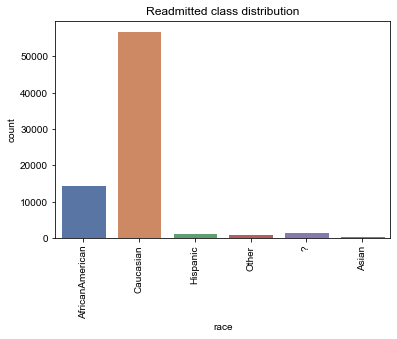

In [14]:
#plotting graph for class distribution of race attribute

mplt.title('Readmitted class distribution')
mplt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'race', data = trainData)
mplt.show()

From the above graph it can be observed that the highest race is of caucasian and least for asian.
#### In the race coulmn there are null values present in the form of '?', it is not valid to assume the race of a person, and as there are only a few missing values, it will be feasible to drop the missing values from race column.

In [15]:
#we can deal with the missing values from race attribute by dropping them

trainData = trainData[~(trainData['race'] == '?' )]

In [16]:
#checking the class distribution for race attribute after dropping null values

raceCount = trainData['race'].value_counts()

print('The class distribution of race attribute is:\n', raceCount)

The class distribution of race attribute is:
 Caucasian          56938
AfricanAmerican    14519
Hispanic            1518
Other               1160
Asian                481
Name: race, dtype: int64


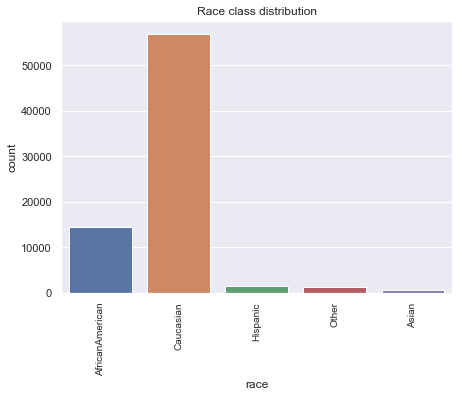

In [17]:
#plotting graph for class distribution of race attribute after dropping the null values

mplt.title('Race class distribution')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'race', data = trainData)
mplt.show()

#### Dealing with missing data in weight column

The class distribution of weight attribute is:
 ?            72325
[75-100)       951
[50-75)        659
[100-125)      434
[125-150)      100
[25-50)         81
[0-25)          32
[150-175)       28
[175-200)        3
>200             3
Name: weight, dtype: int64


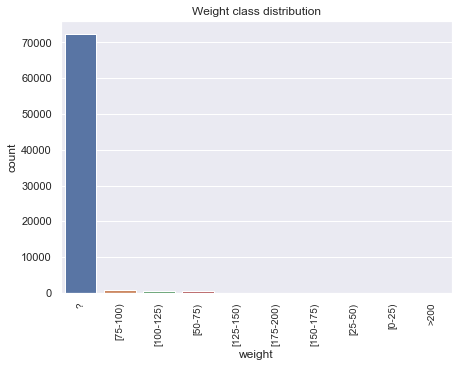

In [18]:
#checking the class distribution for weight attribute

weightCount = trainData['weight'].value_counts()

print('The class distribution of weight attribute is:\n', weightCount)

#plotting graph for class distribution of weight attribute

mplt.title('Weight class distribution')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'weight', data = trainData)
mplt.show()

In [19]:
'''From the above graph its observed that maximum of the values in weight are null, hence it will be better to
drop this column as replacing such huge amount of values can affect the result'''

#droping the weight column from the train dataset
trainData.drop(columns = ['weight'], axis = 1, inplace = True)

#displaying the columns present in the training dataset to verify if the weight column is dropped
trainData.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### Dealing with missing data in payer_code column

The class distribution of payer_code attribute is:
 ?     29638
MC    23665
HM     4650
SP     3609
BC     3449
MD     2560
CP     1849
UN     1706
CM     1467
OG      786
PO      444
DM      415
CH      105
WC       97
OT       73
MP       58
SI       45
Name: payer_code, dtype: int64


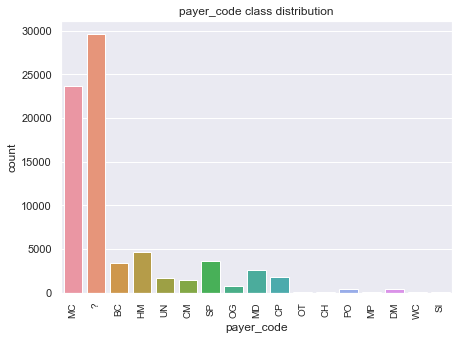

In [20]:
#checking the class distribution for payer_code attribute

payerCodeCount = trainData['payer_code'].value_counts()

print('The class distribution of payer_code attribute is:\n', payerCodeCount)

#plotting graph for class distribution of payer_code attribute

mplt.title('payer_code class distribution')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(20,10)})
barchart = sns.countplot(x = 'payer_code', data = trainData)
mplt.show()

From the above class distribution graph of payer_code attribute it can be observed that the maximum value is of missing data.

In [21]:
'''By studying the above class distribution of payer_code, it can be observed that maximum values are null,
hence droping this column would be feasible rather than replacing null values'''

#droping the payer_code column from the train dataset
trainData.drop(columns = ['payer_code'], axis = 1, inplace = True)

#displaying the columns present in the training dataset to verify if the payer_code column is dropped
trainData.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### Dealing with missing data in medical_specialty column

In [22]:
#checking the class distribution for medical_specialty attribute

medSpcCount = trainData['medical_specialty'].value_counts()

print('The class distribution of medical_specialty attribute is:\n', medSpcCount)

#plotting graph for class distribution of medical_specialty attribute



The class distribution of medical_specialty attribute is:
 ?                                36587
InternalMedicine                 10658
Emergency/Trauma                  5674
Family/GeneralPractice            5478
Cardiology                        3899
                                 ...  
Speech                               1
Neurophysiology                      1
Dermatology                          1
Proctology                           1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64


In [23]:
'''By studying the above class distribution of medical_specialty, it can be observed that maximum values are null,
hence droping this column would be feasible rather than replacing null values'''

#droping the medical_specialty column from the train dataset
trainData.drop(columns = ['medical_specialty'], axis = 1, inplace = True)

#displaying the columns present in the training dataset to verify if the medical_specialty column is dropped
trainData.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

#### Dealing with missing data in diag_1, diag_2, diag_3 column

Missing values in diagnosis columns:
diag_1 : 20
diag_2 : 276
diag_3 : 1081

In [24]:
'''as there are only a few missing values in the Diagnosis 1, Diagnosis 2, and Diagnosis 3 is minimum hence
eliminating those rows will be feasible'''

#dropping values containing '?' from diag_1,diag_2,diag_3 columns
trainData = trainData[~((trainData['diag_1'] == '?') | (trainData['diag_2'] == '?') | (trainData['diag_3'] == '?'))]

In [25]:
print('The number of ? present in each column in the total dataset are:\n')

for i in trainData.columns:
    z = trainData[i][trainData[i] == '?'].count()
    print(i,':',z)

The number of ? present in each column in the total dataset are:

Unnamed: 0 : 0
encounter_id : 0
patient_nbr : 0
race : 0
gender : 0
age : 0
admission_type_id : 0
discharge_disposition_id : 0
admission_source_id : 0
time_in_hospital : 0
num_lab_procedures : 0
num_procedures : 0
num_medications : 0
number_outpatient : 0
number_emergency : 0
number_inpatient : 0
diag_1 : 0
diag_2 : 0
diag_3 : 0
number_diagnoses : 0
max_glu_serum : 0
A1Cresult : 0
metformin : 0
repaglinide : 0
nateglinide : 0
chlorpropamide : 0
glimepiride : 0
acetohexamide : 0
glipizide : 0
glyburide : 0
tolbutamide : 0
pioglitazone : 0
rosiglitazone : 0
acarbose : 0
miglitol : 0
troglitazone : 0
tolazamide : 0
examide : 0
citoglipton : 0
insulin : 0
glyburide-metformin : 0
glipizide-metformin : 0
glimepiride-pioglitazone : 0
metformin-rosiglitazone : 0
metformin-pioglitazone : 0
change : 0
diabetesMed : 0
readmitted : 0


#### From the above output we can conclude that all missing values are handled

In [26]:
'''
The objective here is to build a binary classification model to identify the readmits of a patient, 
as there are three categories in the readmission attribute which are >30, <30 and NO, 
hence for classification purpose we will only need two inputs which are YES and NO.
Thus here we will replace the values <30 with YES and >30 with no, 
as we have to predict early readmission of a patient which is <30
'''

#modifying the readmitted col for better analysis
trainData['readmitted'] = trainData['readmitted'].replace(['<30'], 'YES')
trainData['readmitted'] = trainData['readmitted'].replace(['>30'], 'NO')

#### Analyzing remaining columns in train dataset

In [27]:
#gender attribute

#checking class distribution for gender
genderCount = trainData['gender'].value_counts()
print('The class distribution of gender attribute is:\n',genderCount)

The class distribution of gender attribute is:
 Female             39604
Male               33913
Unknown/Invalid        1
Name: gender, dtype: int64


In [28]:
#as there is only one unknown/invalid in gender, it will be feasible to drop it

trainData.drop(trainData.loc[trainData['gender']== 'Unknown/Invalid'].index, inplace=True)

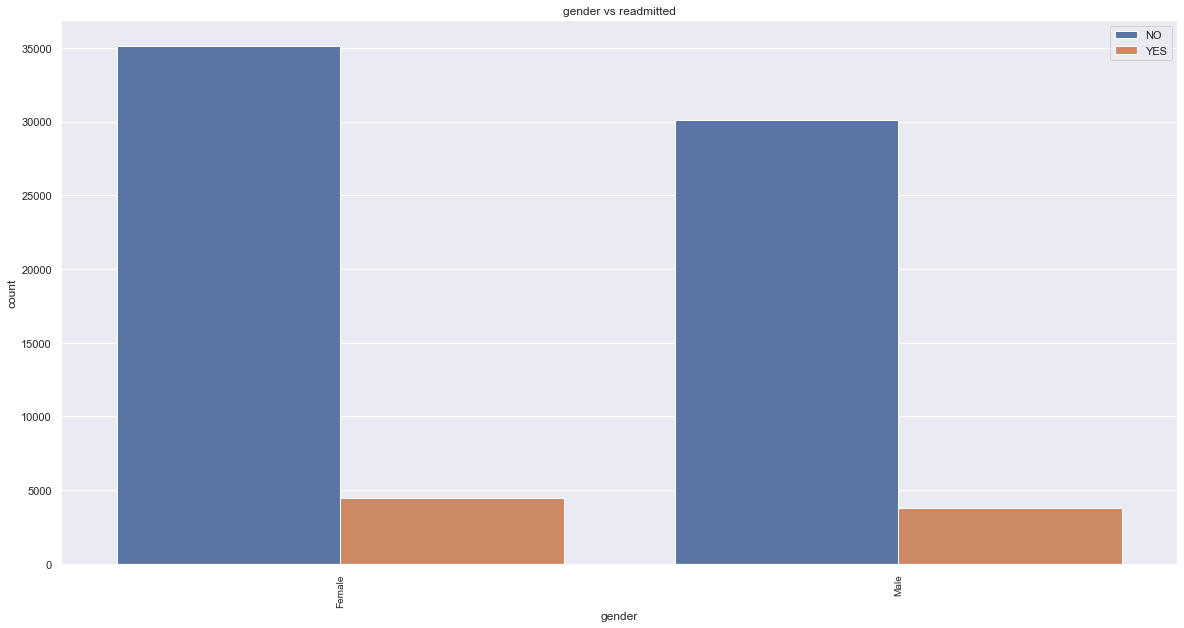

In [29]:

#plotting graph for gender vs readmitted

mplt.title('gender vs readmitted')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(5,3)})
barchart = sns.countplot(x = 'gender',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

From the above output it can be said that in both female and male gender, maximum number of patients were not early readmitted.

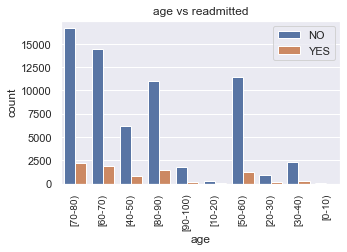

In [30]:
#plotting graph for age vs readmitted

mplt.title('age vs readmitted')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(12,9)})
barchart = sns.countplot(x = 'age',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

From the above graph it can be observed that maximum early readmitts are in the age of 70-80, the number of readmits have increased with age.

In [31]:
#checking the values for the admission_type_id attribute

#importing the id mapping dataset
id_values = pd.read_csv('/Users/divyakhairnar/Documents/FDSA/courseProject/dataset_diabetes/IDs_mapping.csv')

#displaying the first 5 rows of the dataset
id_values.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


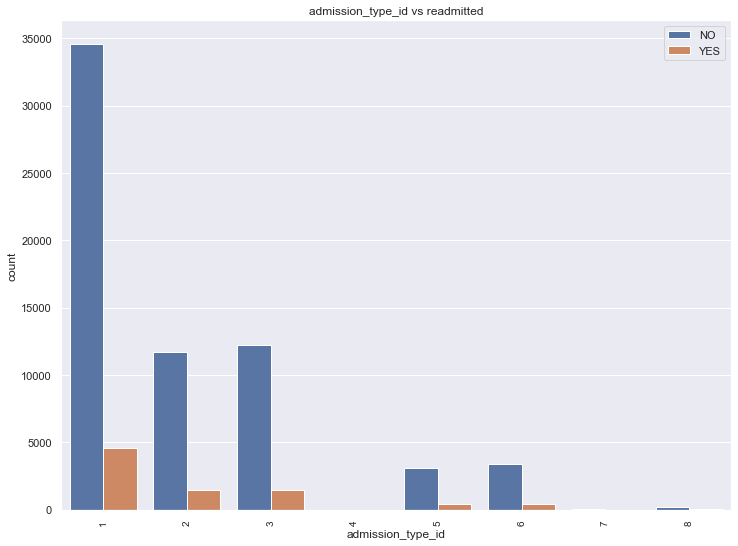

In [32]:
#plotting graph for admission_type_id vs readmitted

mplt.title('admission_type_id vs readmitted')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(12,9)})
barchart = sns.countplot(x = 'admission_type_id',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

From the above graph of it can be seen that the highest number of admits was in the emergency room.

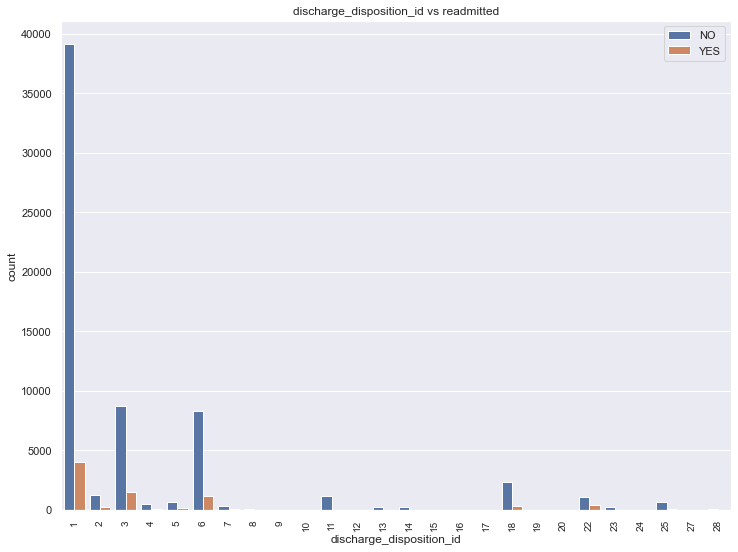

In [33]:
#plotting graph for discharge_disposition_id vs readmitted

mplt.title('discharge_disposition_id vs readmitted')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(15,10)})
barchart = sns.countplot(x = 'discharge_disposition_id',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

From the above graph of it can be seen that there is no as such values obtained from the discharge_disposition_id column which can be used for the classification.

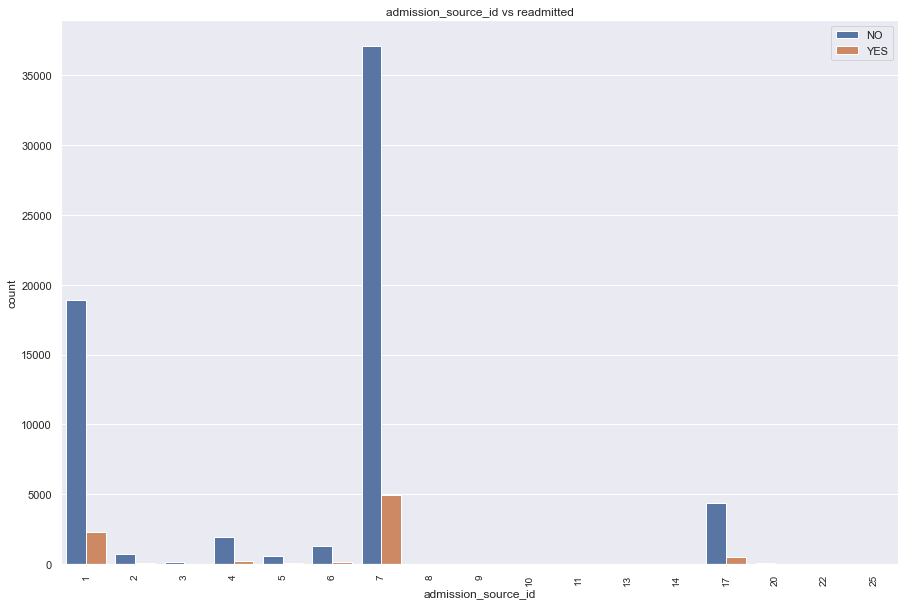

In [34]:
#plotting graph for admission_source_id vs readmitted

mplt.title('admission_source_id vs readmitted')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(12,9)})
barchart = sns.countplot(x = 'admission_source_id',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

From the above graph of it can be seen that the admission_source_id which corresponds to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital as few early readmissions , and maximum no readmissions.

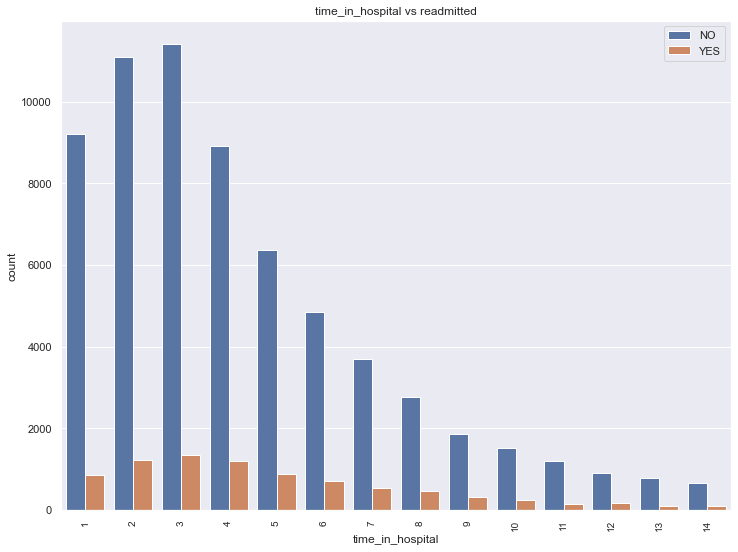

In [35]:
#plotting graph for time_in_hospital vs readmitted

mplt.title('time_in_hospital vs readmitted')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(12,9)})
barchart = sns.countplot(x = 'time_in_hospital',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The time in hospital represents the number of days between admission and discharge of the patient. The highest early readmission can be seen for patients with 3 day time in hospital.

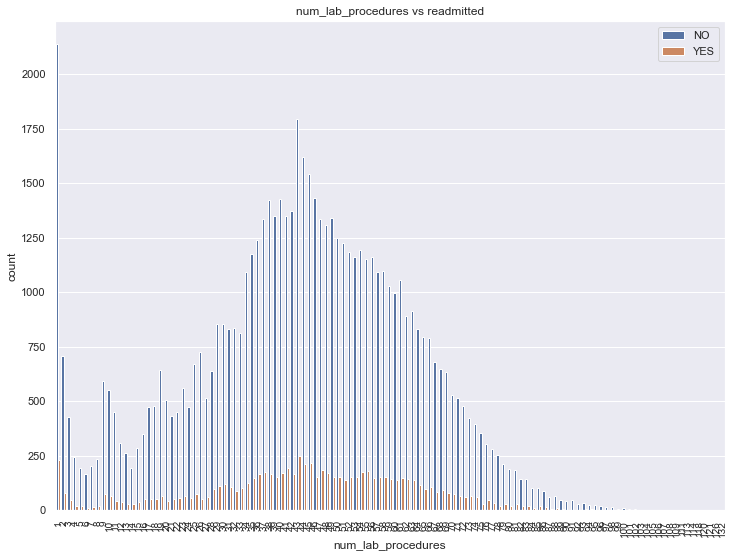

In [36]:
#plotting graph for num_lab_procedures vs readmitted

mplt.title('num_lab_procedures vs readmitted')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(50,20)})
barchart = sns.countplot(x = 'num_lab_procedures',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The num_lab_procedures attributes shows the number of lab tests performed during the encounter of a patient

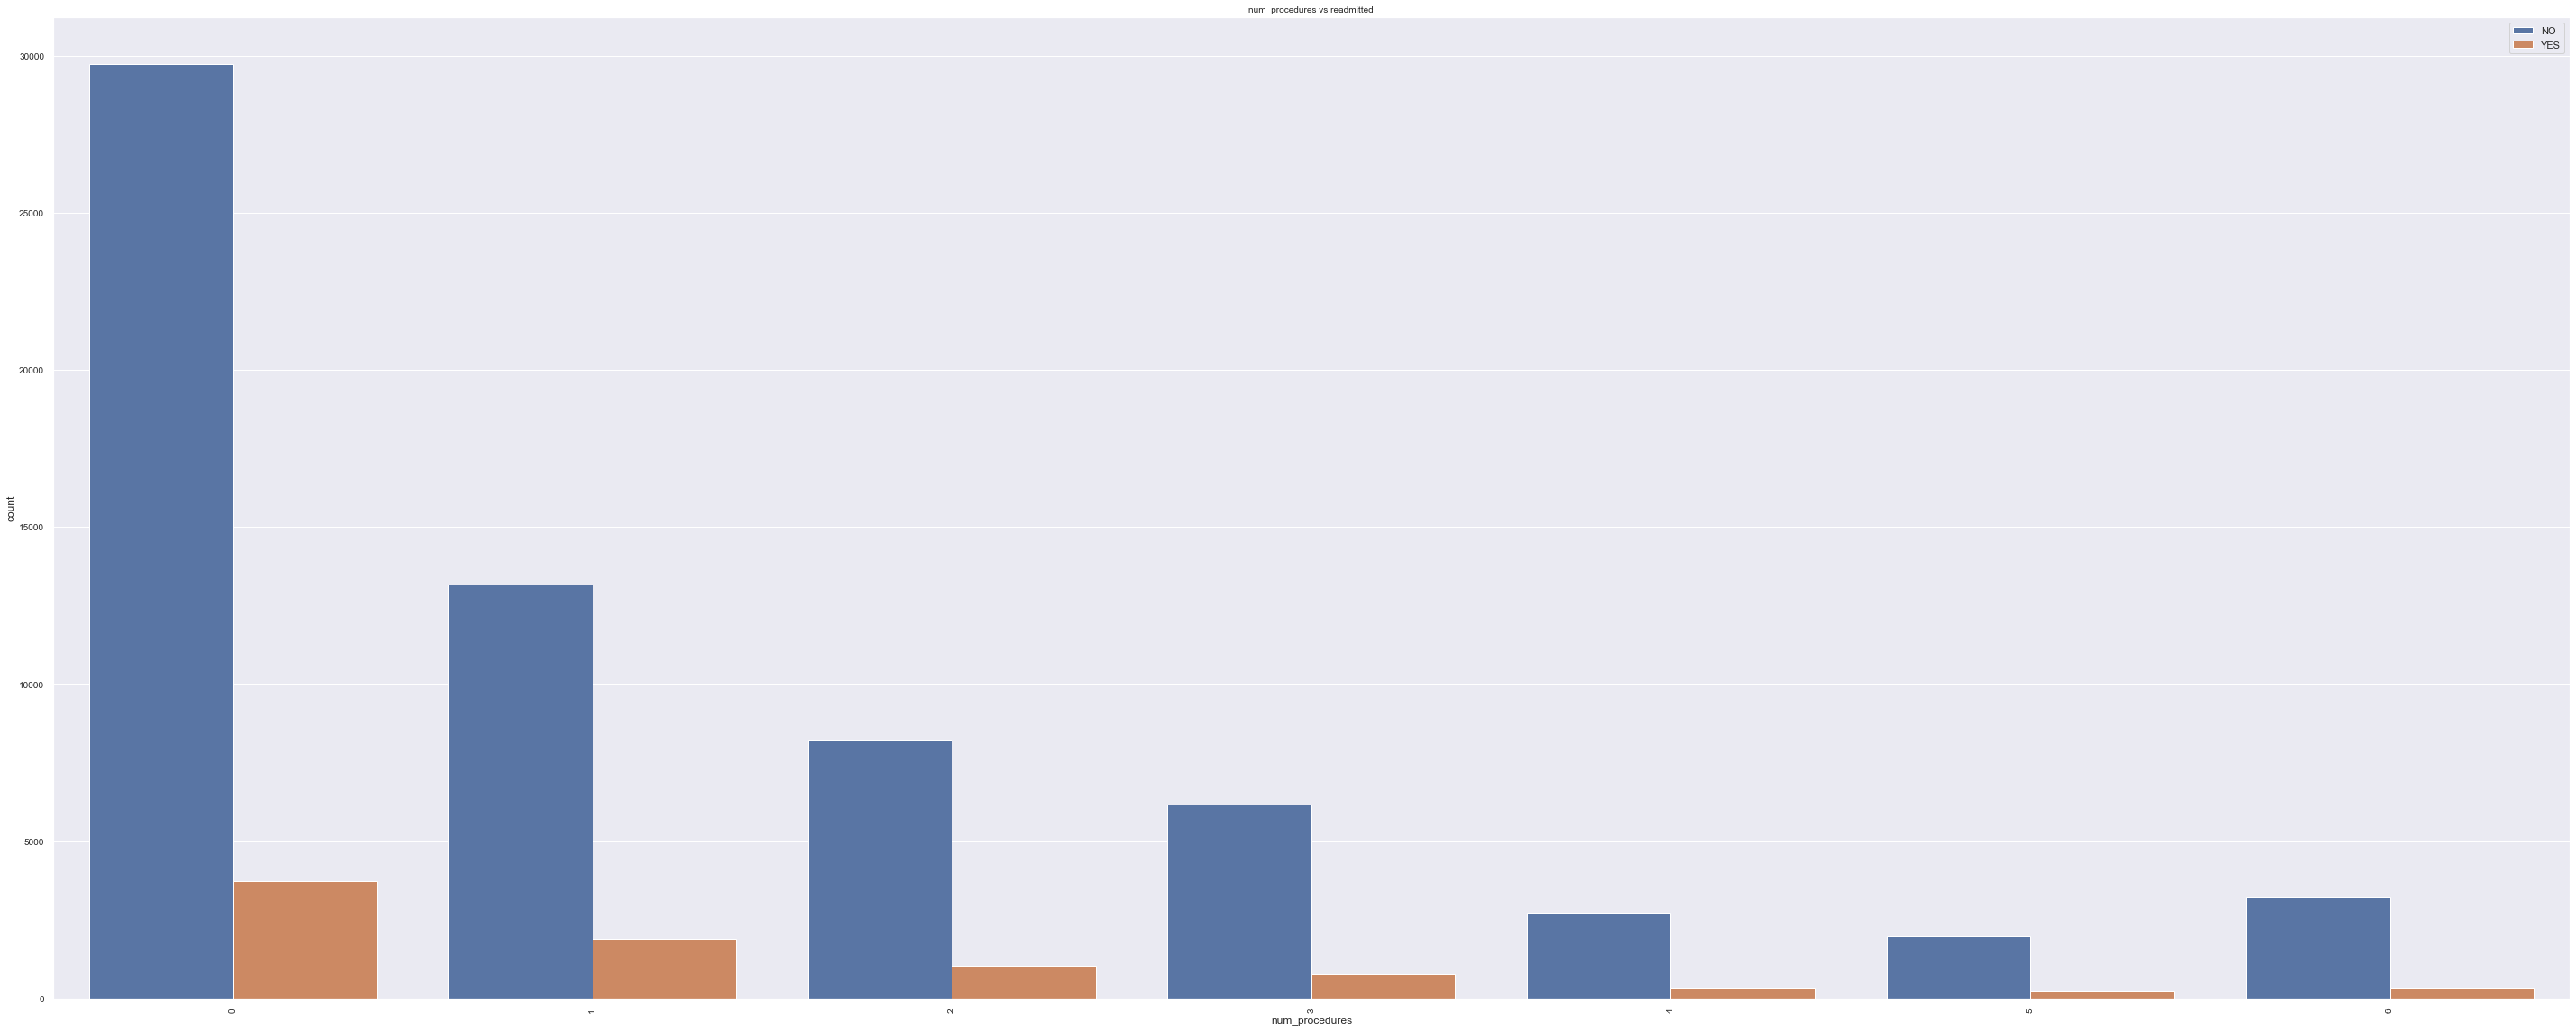

In [37]:
#plotting graph for num_procedures vs readmitted

mplt.title('num_procedures vs readmitted',size = 10)
mplt.xticks(rotation=90, size = 10)
mplt.yticks(size = 10)
sns.set(rc={'figure.figsize':(12,9)})
barchart = sns.countplot(x = 'num_procedures',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The num_procedures attribute represents the number of procedures other than lab tests performed during the 
encounter of a patient

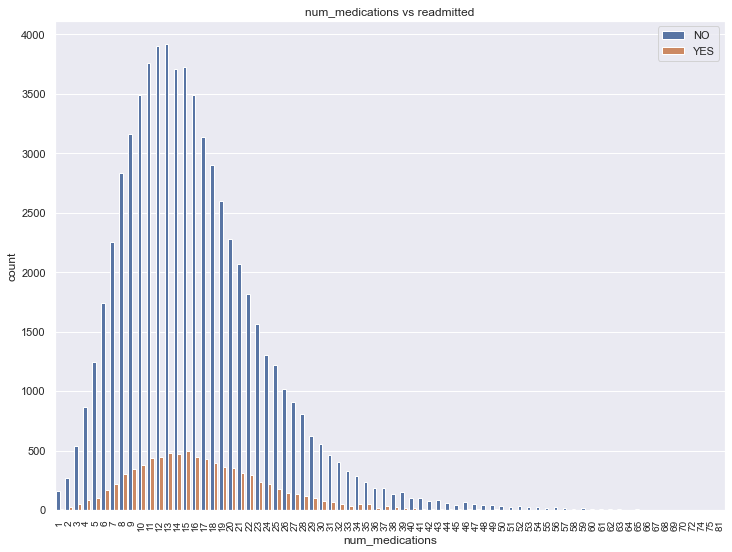

In [38]:
#plotting graph for num_medications vs readmitted

mplt.title('num_medications vs readmitted')
mplt.xticks(rotation=90, size = 10)
sns.set(rc={'figure.figsize':(40,10)})
barchart = sns.countplot(x = 'num_medications',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The num_medications represents the number of distinct generic names administered during the encounter of the patient

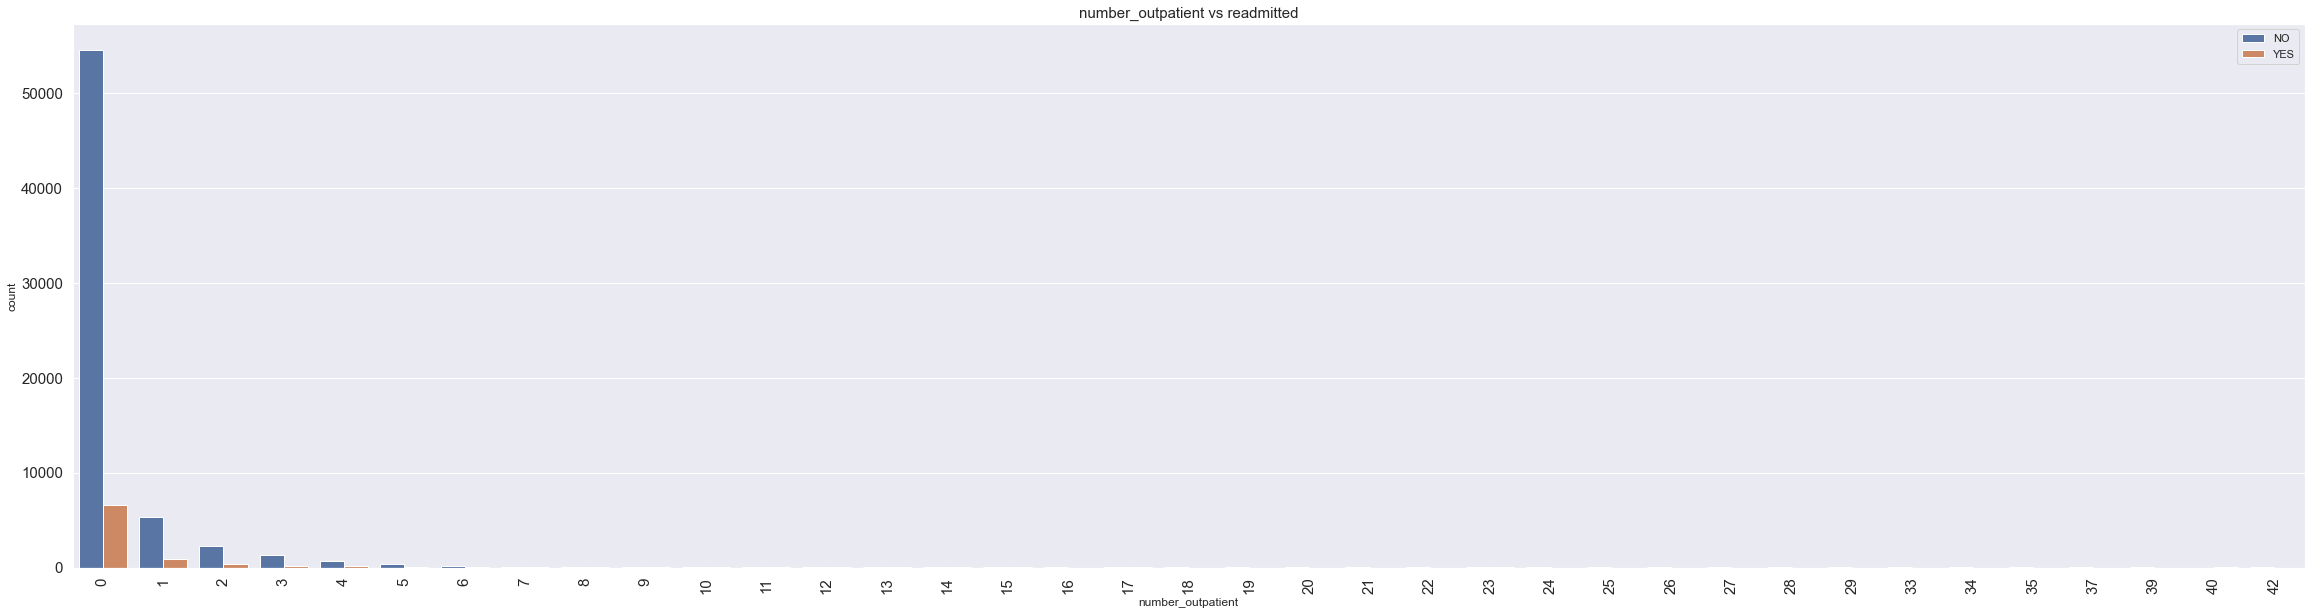

In [39]:
#plotting graph for number_outpatient vs readmitted

mplt.title('number_outpatient vs readmitted',size = 15)
mplt.xticks(rotation=90, size = 15)
mplt.yticks(size = 15)
sns.set(rc={'figure.figsize':(20,10)})
barchart = sns.countplot(x = 'number_outpatient',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The number_outpatient represents the number of outpatient visits of the patient in the year preceding the encounter. From the above graph it can be seen that there is very less data available for this attribute.

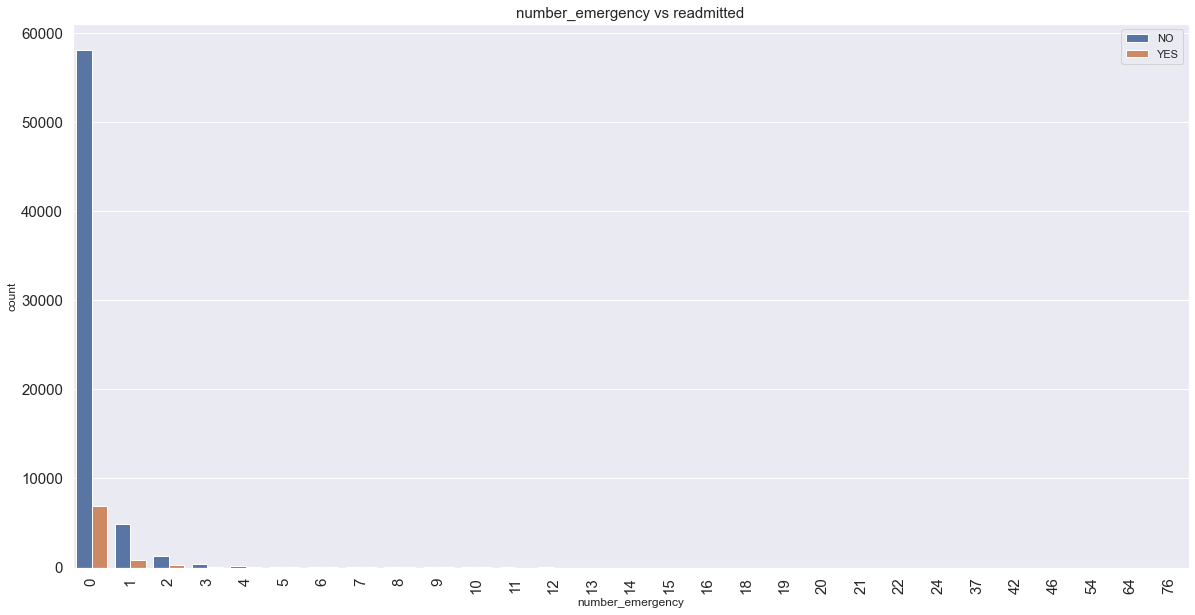

In [40]:
#plotting graph for number_emergency vs readmitted

mplt.title('number_emergency vs readmitted',size = 15)
mplt.xticks(rotation=90, size = 15)
mplt.yticks(size = 15)
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'number_emergency',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The number_emergency represents the number of emergency visits of the patient in the year preceding the encounter. From the above graph it can be observed that there is very less data available for this attribute.

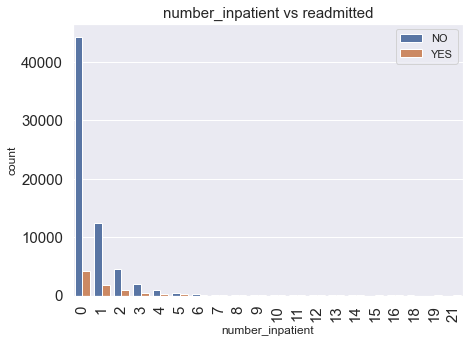

In [41]:
#plotting graph for number_inpatient vs readmitted

mplt.title('number_inpatient vs readmitted',size = 15)
mplt.xticks(rotation=90, size = 15)
mplt.yticks(size = 15)
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'number_inpatient',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The number of number_inpatient represents the number of inpatient visits of the patient in the year preceding the encounter. From the above graph it can be observed that there is very less data available for this attribute.

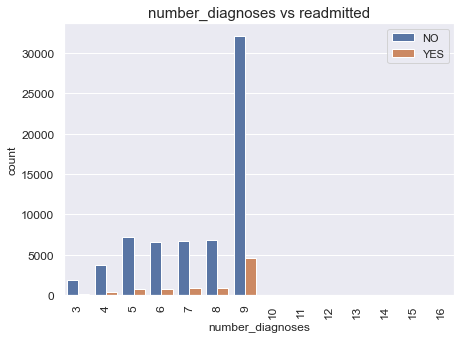

In [42]:
#plotting graph for number_diagnoses vs readmitted

mplt.title('number_diagnoses vs readmitted',size = 15)
mplt.xticks(rotation=90, size = 12)
mplt.yticks(size = 12)
sns.set(rc={'figure.figsize':(30,9)})
barchart = sns.countplot(x = 'number_diagnoses',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The number_diagnoses attribute represents the number of diagnoses entered to the system.

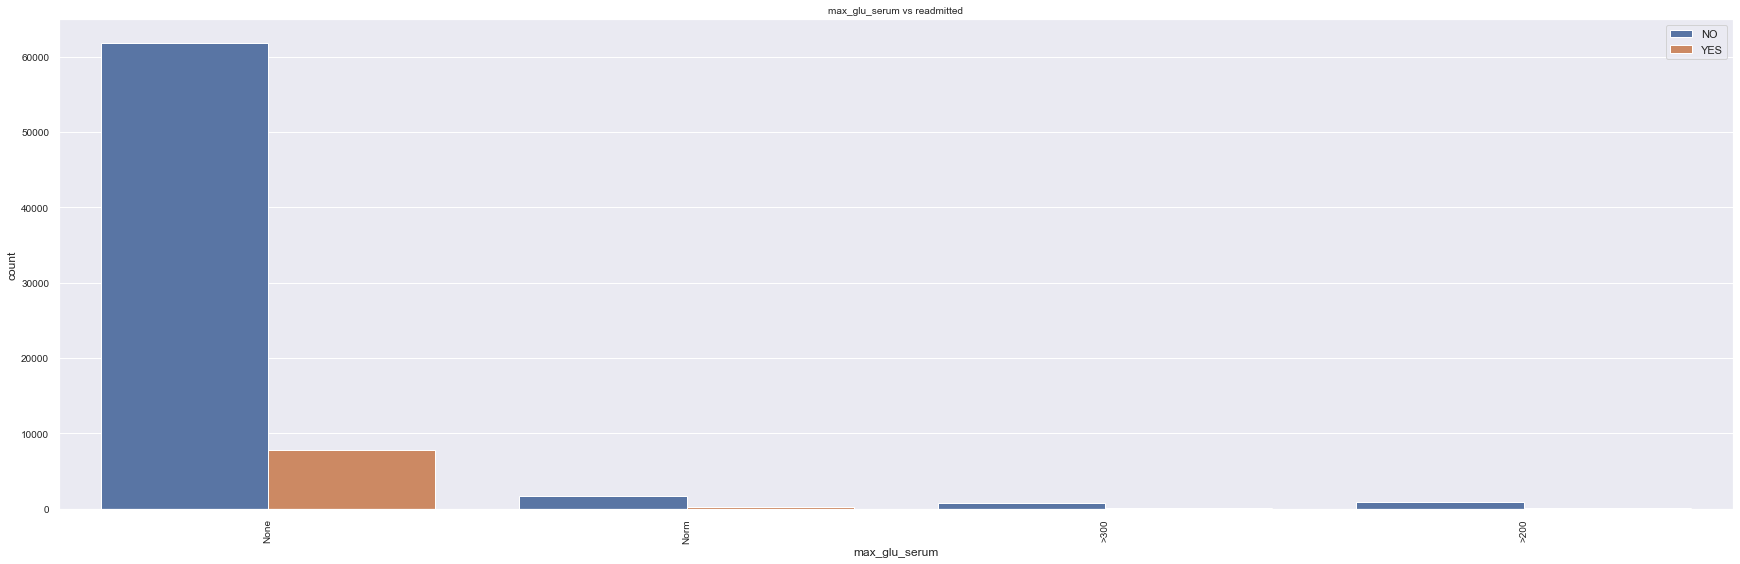

In [43]:
#plotting graph for max_glu_serum vs readmitted

mplt.title('max_glu_serum vs readmitted',size = 10)
mplt.xticks(rotation=90, size = 10)
mplt.yticks(size = 10)
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'max_glu_serum',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The max_glu_serum attribute represents the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured. The maximum readmits are for patients who has taken no test.

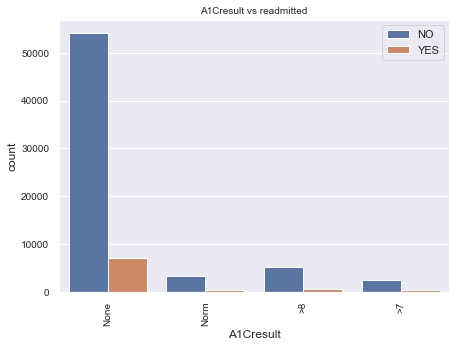

In [44]:
#plotting graph for A1Cresult vs readmitted

mplt.title('A1Cresult vs readmitted',size = 10)
mplt.xticks(rotation=90, size = 10)
mplt.yticks(size = 10)
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'A1Cresult',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The A1Cresult attribute represents the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured. The maximum readmits are for patients who has not taken the A1Cresult test.

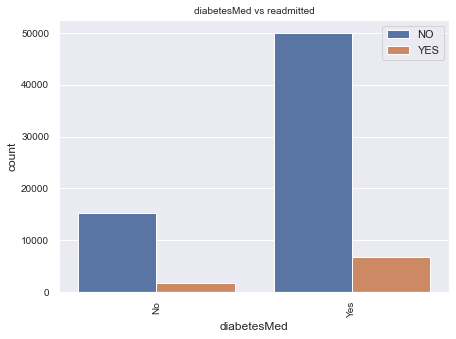

In [45]:
#plotting graph for diabetesMed vs readmitted

mplt.title('diabetesMed vs readmitted',size = 10)
mplt.xticks(rotation=90, size = 10)
mplt.yticks(size = 10)
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'diabetesMed',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The diabetesMed attribute represents the if there was any diabetic medication prescribed or not. The maximum readmits are for patients who has been prescribed the diabetes medicines.

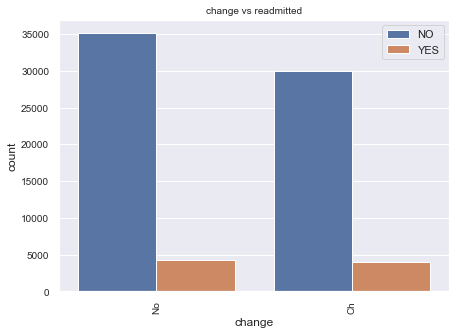

In [46]:
#plotting graph for change vs readmitted

mplt.title('change vs readmitted',size = 10)
mplt.xticks(rotation=90, size = 10)
mplt.yticks(size = 10)
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'change',hue = 'readmitted', data = trainData)
mplt.legend(loc='upper right')
mplt.show()

The change attribute indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”. From the above graphs it can be observed the readmits and no readmits have almost the same values for change and no change in diabetic medications.

There are 23 other medications which are : metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. 

The values represent: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

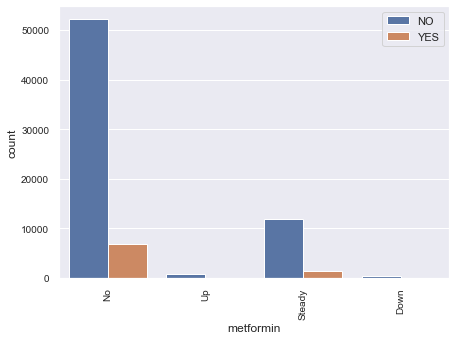

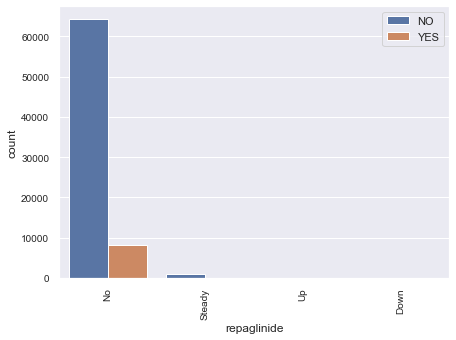

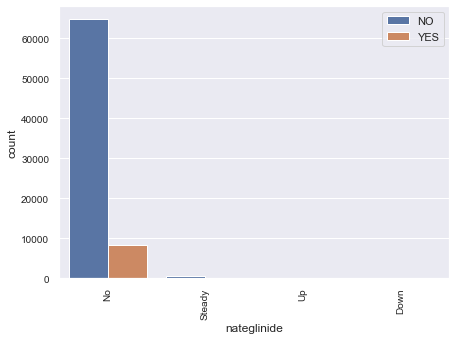

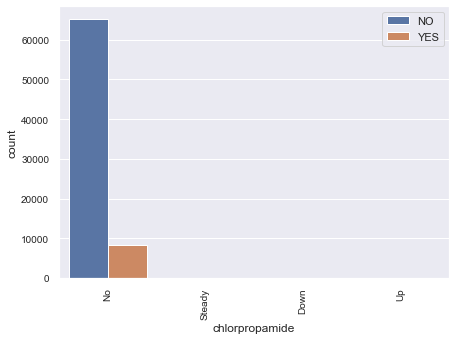

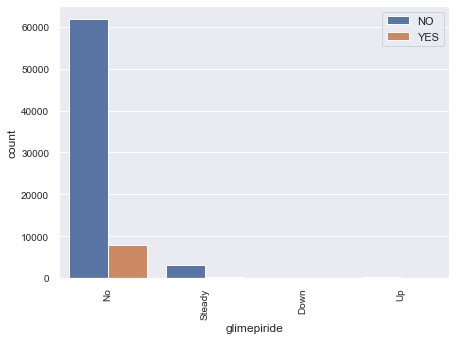

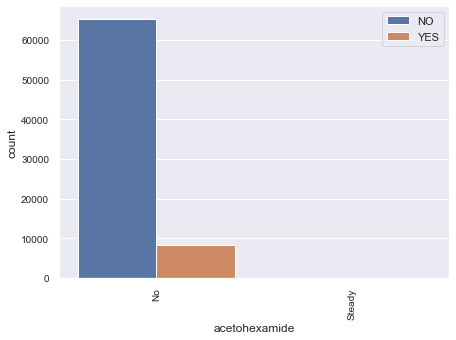

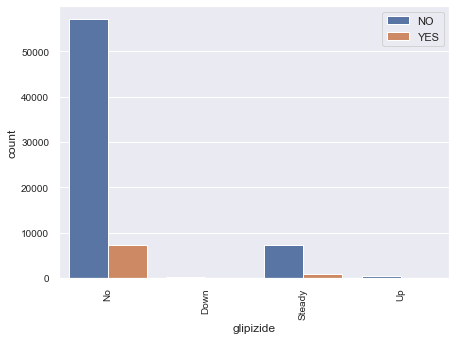

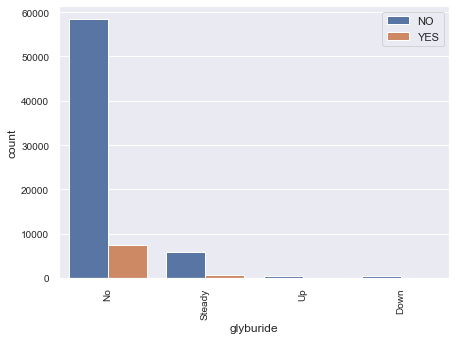

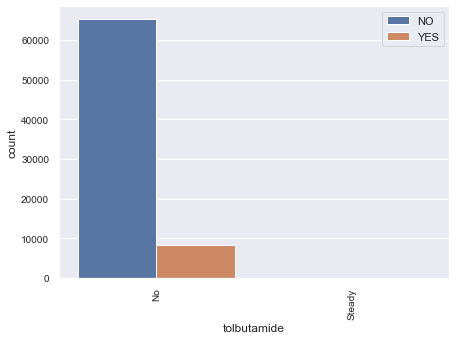

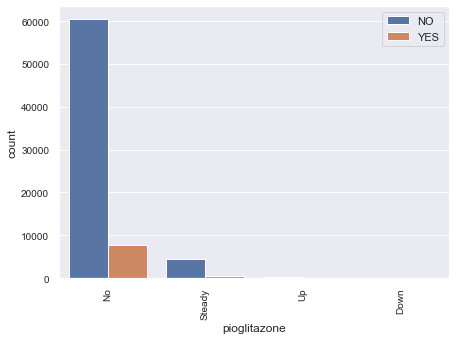

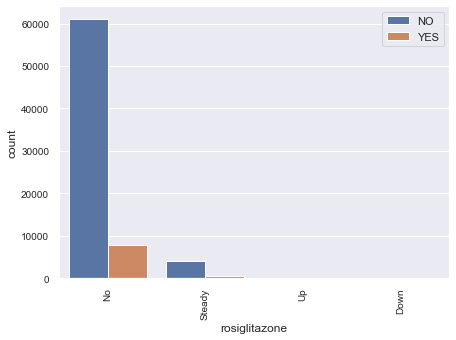

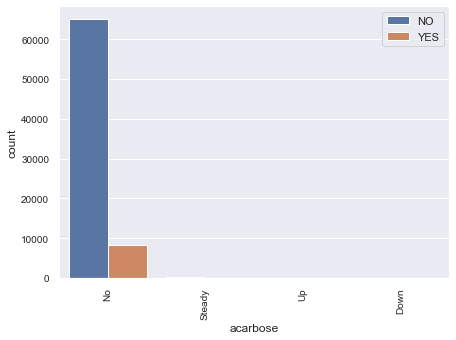

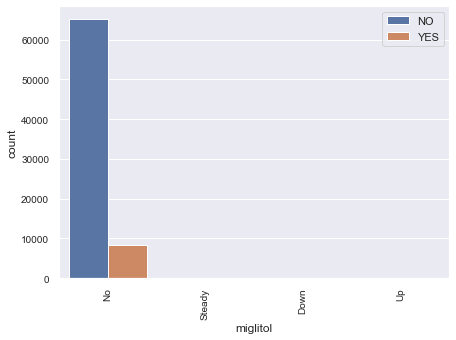

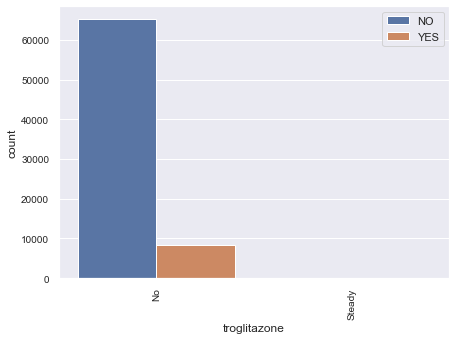

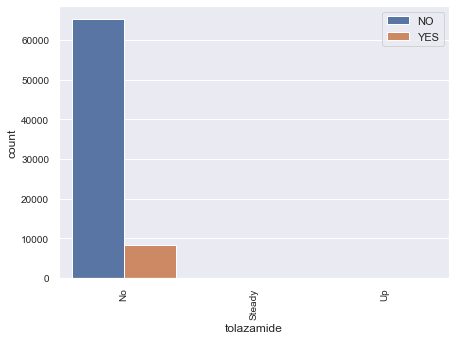

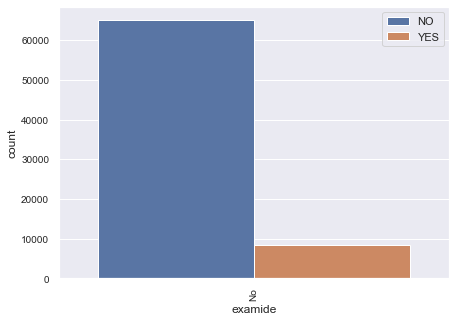

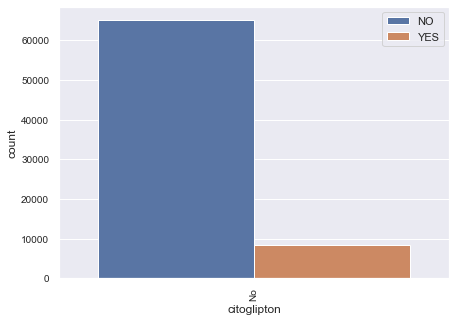

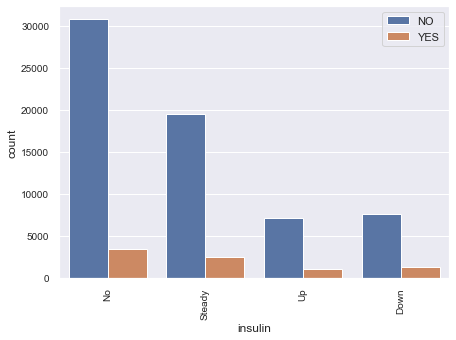

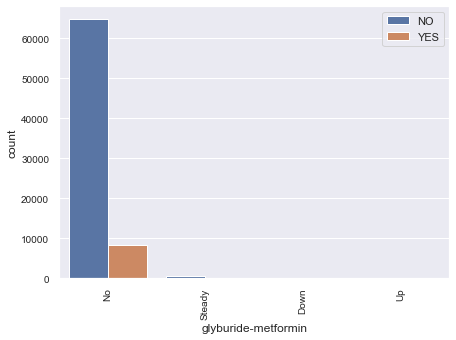

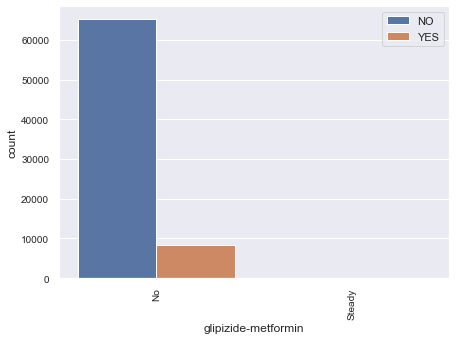

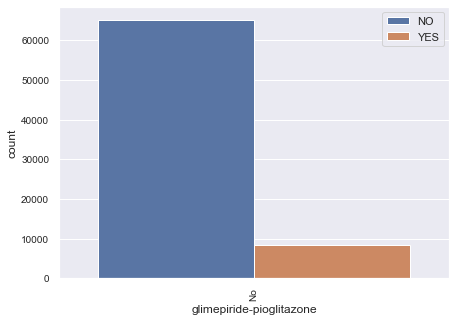

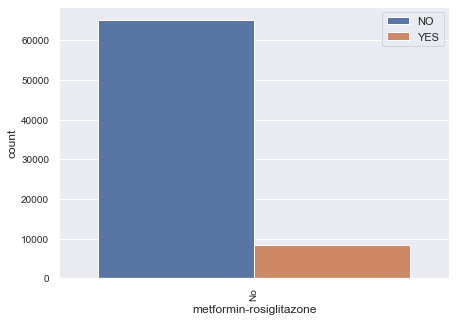

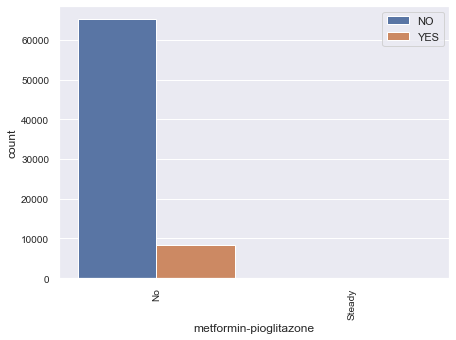

In [47]:
tempCols = trainData[['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide', 
                      'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol', 
                      'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin', 
                      'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
                      'metformin-pioglitazone']]

for i in tempCols:
    mplt.xticks(rotation=90, size = 10)
    mplt.yticks(size = 10)
    barchart = sns.countplot(x = i,hue = 'readmitted', data = trainData)
    mplt.legend(loc='upper right')
    mplt.show()

### Analyzing the given test dataset

In [48]:
#importing the test dataset

testData = pd.read_csv('/Users/divyakhairnar/Documents/FDSA/courseProject/dataset_diabetes/diabetic_data_test.csv')

#displaying first 5 rows of the test dataset
testData.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,77011,233192070,110179728,Caucasian,Female,[80-90),?,1,3,7,...,No,No,No,No,No,No,No,Ch,Yes,>30
1,95048,356145692,40743441,Caucasian,Female,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,29619,96590916,235017,AfricanAmerican,Male,[70-80),?,2,1,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
3,85031,268888392,70368660,Caucasian,Male,[70-80),?,3,6,1,...,No,No,No,No,No,No,No,No,No,NO
4,13003,52253142,19835496,AfricanAmerican,Female,[70-80),?,3,18,1,...,No,No,No,No,No,No,No,Ch,Yes,NO


In [49]:
#checking for missing values for test data

print('The number of missing values(?) present in each column in test data are:\n')

for i in testData.columns:
    miss_test = testData[i][testData[i] == '?'].count()
    print(i,':',miss_test)

The number of missing values(?) present in each column in test data are:

Unnamed: 0 : 0
encounter_id : 0
patient_nbr : 0
race : 565
gender : 0
age : 0
weight : 24634
admission_type_id : 0
discharge_disposition_id : 0
admission_source_id : 0
time_in_hospital : 0
payer_code : 10208
medical_specialty : 12467
num_lab_procedures : 0
num_procedures : 0
num_medications : 0
number_outpatient : 0
number_emergency : 0
number_inpatient : 0
diag_1 : 1
diag_2 : 82
diag_3 : 342
number_diagnoses : 0
max_glu_serum : 0
A1Cresult : 0
metformin : 0
repaglinide : 0
nateglinide : 0
chlorpropamide : 0
glimepiride : 0
acetohexamide : 0
glipizide : 0
glyburide : 0
tolbutamide : 0
pioglitazone : 0
rosiglitazone : 0
acarbose : 0
miglitol : 0
troglitazone : 0
tolazamide : 0
examide : 0
citoglipton : 0
insulin : 0
glyburide-metformin : 0
glipizide-metformin : 0
glimepiride-pioglitazone : 0
metformin-rosiglitazone : 0
metformin-pioglitazone : 0
change : 0
diabetesMed : 0
readmitted : 0


In [50]:
#handeling the missing data in test dataset in the same way done for training dataset

#dropping the missing values from race attribute

testData = testData[~(testData['race'] == '?' )]

In [51]:
#droping the weight,payer_code, medical_specialty column from the train dataset
testData.drop(columns = ['weight'], axis = 1, inplace = True)
testData.drop(columns = ['payer_code'], axis = 1, inplace = True)
testData.drop(columns = ['medical_specialty'], axis = 1, inplace = True)

In [52]:
#checking column names in test data to check if the unncecssary columns are dropped

testData.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [53]:
'''as there are only a few missing values in the Diagnosis 1, Diagnosis 2, and Diagnosis 3 is minimum hence
eliminating those rows will be feasible'''

#dropping values containing '?' from diag_1,diag_2,diag_3 columns
testData = testData[~((testData['diag_1'] == '?') | (testData['diag_2'] == '?') | (testData['diag_3'] == '?'))]

In [54]:
#verifying if the missing values for test data are handled

print('The number of missing values(?) present in each column in test data are:\n')

for i in testData.columns:
    miss_test = testData[i][testData[i] == '?'].count()
    print(i,':',miss_test)

The number of missing values(?) present in each column in test data are:

Unnamed: 0 : 0
encounter_id : 0
patient_nbr : 0
race : 0
gender : 0
age : 0
admission_type_id : 0
discharge_disposition_id : 0
admission_source_id : 0
time_in_hospital : 0
num_lab_procedures : 0
num_procedures : 0
num_medications : 0
number_outpatient : 0
number_emergency : 0
number_inpatient : 0
diag_1 : 0
diag_2 : 0
diag_3 : 0
number_diagnoses : 0
max_glu_serum : 0
A1Cresult : 0
metformin : 0
repaglinide : 0
nateglinide : 0
chlorpropamide : 0
glimepiride : 0
acetohexamide : 0
glipizide : 0
glyburide : 0
tolbutamide : 0
pioglitazone : 0
rosiglitazone : 0
acarbose : 0
miglitol : 0
troglitazone : 0
tolazamide : 0
examide : 0
citoglipton : 0
insulin : 0
glyburide-metformin : 0
glipizide-metformin : 0
glimepiride-pioglitazone : 0
metformin-rosiglitazone : 0
metformin-pioglitazone : 0
change : 0
diabetesMed : 0
readmitted : 0


In [55]:
#updating data in test dataset for readmitted attribute similar to training dataset

testData['readmitted'] = testData['readmitted'].replace(['<30'], 'YES')
testData['readmitted'] = testData['readmitted'].replace(['>30'], 'NO')

testData.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,77011,233192070,110179728,Caucasian,Female,[80-90),1,3,7,11,...,No,No,No,No,No,No,No,Ch,Yes,NO
1,95048,356145692,40743441,Caucasian,Female,[30-40),1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,29619,96590916,235017,AfricanAmerican,Male,[70-80),2,1,1,1,...,No,Steady,No,No,No,No,No,No,Yes,NO
3,85031,268888392,70368660,Caucasian,Male,[70-80),3,6,1,3,...,No,No,No,No,No,No,No,No,No,NO
4,13003,52253142,19835496,AfricanAmerican,Female,[70-80),3,18,1,6,...,No,No,No,No,No,No,No,Ch,Yes,NO


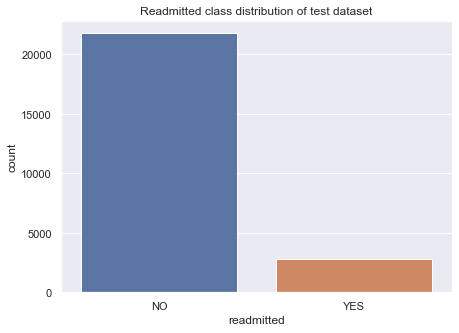

In [56]:
#plotting graph for class distribution of readmitted attribute of test dataset

mplt.title('Readmitted class distribution of test dataset')
sns.set(rc={'figure.figsize':(7,5)})
barchart = sns.countplot(x = 'readmitted', data = testData)
mplt.show()

In [57]:
#determining the class distribution for gender attribute

genderCount = trainData['gender'].value_counts()

print('The class distribution of gender attribute is:\n', genderCount)

#plotting graph for class distribution of gender attribute

The class distribution of gender attribute is:
 Female    39604
Male      33913
Name: gender, dtype: int64


#### --------------------------------------------------------------------------------------------------------------------------------------------------------

#### From the above data analysis and studying the graphs, below columns are selected for the model to be trained upon. The columns which had few values affecting the output are not selected as it will have no effect on the model, hence selecting only the below required columns to train and test the model.

In [58]:
finalCols = ['race','gender','age','admission_type_id','time_in_hospital',
            'diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide',
            'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
            'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin',
            'glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
            'metformin-pioglitazone','change','diabetesMed','readmitted']

In [59]:
trainData = trainData[['race','gender','age','admission_type_id','time_in_hospital',
            'diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide',
            'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
            'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin',
            'glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
            'metformin-pioglitazone','change','diabetesMed','readmitted']]

trainData.head()

,race,gender,age,admission_type_id,time_in_hospital,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[70-80),3,1,414,411,996,None,None,...,No,No,No,No,No,No,No,No,No,NO
2,Caucasian,Male,[60-70),3,4,513,250,553,None,None,...,No,No,No,No,No,No,No,Ch,Yes,NO
3,AfricanAmerican,Male,[40-50),3,2,558,724,401,None,None,...,No,No,No,No,No,No,No,No,No,NO
4,Caucasian,Male,[80-90),1,1,789,250,401,None,Norm,...,No,No,No,No,No,No,No,No,No,NO
5,Caucasian,Male,[80-90),1,2,427,728,424,None,>8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [60]:
testData = testData[['race','gender','age','admission_type_id','time_in_hospital',
            'diag_1','diag_2','diag_3','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide',
            'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone',
            'rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin',
            'glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
            'metformin-pioglitazone','change','diabetesMed','readmitted']]

testData.head()

,race,gender,age,admission_type_id,time_in_hospital,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[80-90),1,11,158,569,276,None,None,...,No,No,No,No,No,No,No,Ch,Yes,NO
1,Caucasian,Female,[30-40),1,5,481,276,276,None,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,AfricanAmerican,Male,[70-80),2,1,436,401,250,None,None,...,No,Steady,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[70-80),3,3,715,285,250,None,None,...,No,No,No,No,No,No,No,No,No,NO
4,AfricanAmerican,Female,[70-80),3,6,715,599,401,None,None,...,No,No,No,No,No,No,No,Ch,Yes,NO


#### Preprocessing the dataset

In [61]:
#importing library for preprocessing
from sklearn import preprocessing

#creating a function for label encoding
def labelEnc(x):
    labelEncoder = preprocessing.LabelEncoder()
    for i in finalCols:
        x[i]= labelEncoder.fit_transform(x[i])

#applying label encoding to train data
labelEnc(trainData)

#applying label encoding to test data
labelEnc(testData)

In [62]:
#displaying train data to verify label encoding

trainData.head()

,race,gender,age,admission_type_id,time_in_hospital,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,7,2,0,256,231,640,2,2,...,0,1,1,0,0,0,0,1,0,0
2,2,1,6,2,3,337,69,356,2,2,...,0,1,1,0,0,0,0,0,1,0
3,0,1,4,2,1,371,456,239,2,2,...,0,1,1,0,0,0,0,1,0,0
4,2,1,8,0,0,529,69,239,2,3,...,0,1,1,0,0,0,0,1,0,0
5,2,1,8,0,1,268,460,257,2,1,...,0,2,1,0,0,0,0,0,1,0


In [63]:
#displaying test data to verify label encoding

testData.head()

,race,gender,age,admission_type_id,time_in_hospital,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,8,0,10,18,308,102,2,2,...,0,1,1,0,0,0,0,0,1,0
1,2,0,3,0,4,259,100,102,2,2,...,0,3,1,0,0,0,0,0,1,0
2,0,1,7,1,0,227,189,56,2,2,...,0,2,1,0,0,0,0,1,1,0
3,2,1,7,2,2,407,109,56,2,2,...,0,1,1,0,0,0,0,1,0,0
4,0,0,7,2,5,407,333,190,2,2,...,0,1,1,0,0,0,0,0,1,0


In [64]:
#displaying columns in train Data

trainData.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [65]:
#displaying columns in test Data

testData.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [66]:
#importing library required for normalisation
from sklearn.preprocessing import MinMaxScaler

#creating function for normalizing the data
def dataNorm(x):
    norm = MinMaxScaler()
    x = norm.fit_transform(x)
    
#applying normalization to training data    
dataNorm(trainData)

#applying normalization to testing data
dataNorm(testData)

In [67]:
#printing the normalized train data
print('The train data after normalization data is:\n',trainData.head())

The train data after normalization data is:
    race  gender  age  admission_type_id  time_in_hospital  diag_1  diag_2  \
1     2       0    7                  2                 0     256     231   
2     2       1    6                  2                 3     337      69   
3     0       1    4                  2                 1     371     456   
4     2       1    8                  0                 0     529      69   
5     2       1    8                  0                 1     268     460   

   diag_3  max_glu_serum  A1Cresult  ...  citoglipton  insulin  \
1     640              2          2  ...            0        1   
2     356              2          2  ...            0        1   
3     239              2          2  ...            0        1   
4     239              2          3  ...            0        1   
5     257              2          1  ...            0        2   

   glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
1                    1

In [68]:
#printing the normalized test data
print('The test data after normalization data is:\n',testData.head())

The test data after normalization data is:
    race  gender  age  admission_type_id  time_in_hospital  diag_1  diag_2  \
0     2       0    8                  0                10      18     308   
1     2       0    3                  0                 4     259     100   
2     0       1    7                  1                 0     227     189   
3     2       1    7                  2                 2     407     109   
4     0       0    7                  2                 5     407     333   

   diag_3  max_glu_serum  A1Cresult  ...  citoglipton  insulin  \
0     102              2          2  ...            0        1   
1     102              2          2  ...            0        3   
2      56              2          2  ...            0        2   
3      56              2          2  ...            0        1   
4     190              2          2  ...            0        1   

   glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
0                    1 

In [69]:
#implementing decision tree model for binary classification

#importing libraries required to implement decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#assigning training and testing data to the respective train and test variables required for the model
X_train = trainData.drop('readmitted',axis = 1)
y_train = trainData['readmitted']

X_test = testData.drop('readmitted',axis = 1)
y_test = testData['readmitted']


#implementing decision tree model
model = DecisionTreeClassifier()

#fitting the decision tree model on train data
model.fit(X_train, y_train)

#predicting test data
y_pred = model.predict(X_test)

#determining the accuracy of the model
DT_accuracy = (metrics.accuracy_score(y_test, y_pred)) * 100
print('\nThe accuracy of decision tree model is: ', DT_accuracy)

#determining confusing matrix
DT_cm = metrics.confusion_matrix(y_test, y_pred)
print('\nThe confusion matrix for decision tree model is :\n', DT_cm)

tp, fp, fn, tn = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f'\nTrue Positive(TP) : {tp} \nTrue Negative(TN) : {tn} \nFalse Positive(FP) : {fp} \nFalse Negative(FN) : {fn}')

#determining the precision of the model
precision = tp/(tp+fp)
print('The precision of decision tree model is',precision*100)

#determining the recall of the model
recall = tp/(tp+fn)
print('The recall of decision tree model is', recall*100)

#determining the f1-score of the model
f1 = (2*precision*recall)/(precision+recall)
print('The f1-score of decision tree model is', f1*100)


The accuracy of decision tree model is:  72.18259629101283

The confusion matrix for decision tree model is :
 [[17109  4661]
 [ 2164   601]]

True Positive(TP) : 17109 
True Negative(TN) : 601 
False Positive(FP) : 4661 
False Negative(FN) : 2164
The precision of decision tree model is 78.58980248047772
The recall of decision tree model is 88.77185700202355
The f1-score of decision tree model is 83.37109860390322


In [72]:
#implementing random forest for classification

#importing library required for the random forest classifier
from sklearn.ensemble import RandomForestClassifier

#defining random forest model
RFmodel = RandomForestClassifier(n_estimators=100)

#fitting random forest model on train data
RFmodel.fit(X_train,y_train)

#prediction on test data
y_pred=RFmodel.predict(X_test)

#determining the accuracy of the model
RF_accuracy = (metrics.accuracy_score(y_test, y_pred)) * 100
print('\nThe accuracy of random forest model is: ', RF_accuracy)

#determining confusing matrix
RF_cm = metrics.confusion_matrix(y_test, y_pred)
print('\nThe confusion matrix for random forest model is :\n', RF_cm)

tp, fp, fn, tn = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f'\nTrue Positive(TP) : {tp} \nTrue Negative(TN) : {tn} \nFalse Positive(FP) : {fp} 
      \nFalse Negative(FN) : {fn}')

#determining the precision of the model
precision = tp/(tp+fp)
print('The precision of random forest model is',precision*100)

#determining the recall of the model
recall = tp/(tp+fn)
print('The recall of random forest model is', recall*100)

#determining the f1-score of the model
f1 = (2*precision*recall)/(precision+recall)
print('The f1-score of random forest model is', f1*100)


The accuracy of random forest model is:  88.73038516405136

The confusion matrix for random forest model is :
 [[21769     1]
 [ 2764     1]]

True Positive(TP) : 21769 
True Negative(TN) : 1 
False Positive(FP) : 1 
False Negative(FN) : 2764
The precision of random forest model is 99.99540652273772
The recall of random forest model is 88.73354257530673
The f1-score of random forest model is 94.02846467831458


In [73]:
#implementing knn algorithm

#importing library required for knn classifier
from sklearn.neighbors import KNeighborsClassifier

#defining knn model
knnModel = KNeighborsClassifier(n_neighbors=5)

#fitting knn model to train data
knnModel.fit(X_train, y_train)

#predicting test data
y_pred=knnModel.predict(X_test)

#determining the accuracy of the model
knn_accuracy = (metrics.accuracy_score(y_test, y_pred)) * 100
print('\nThe accuracy of knn model is: ', knn_accuracy)

#determining confusing matrix
knn_cm = metrics.confusion_matrix(y_test, y_pred)
print('\nThe confusion matrix for knn model is :\n', RF_cm)

tp, fp, fn, tn = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f'\nTrue Positive(TP) : {tp} \nTrue Negative(TN) : {tn} \nFalse Positive(FP) : {fp} 
      \nFalse Negative(FN) : {fn}')

#determining the precision of the model
precision = tp/(tp+fp)
print('The precision of knn model is',precision*100)

#determining the recall of the model
recall = tp/(tp+fn)
print('The recall of knn model is', recall*100)

#determining the f1-score of the model
f1 = (2*precision*recall)/(precision+recall)
print('The f1-score of knn model is', f1*100)


The accuracy of knn model is:  87.71550845730589

The confusion matrix for knn model is :
 [[21769     1]
 [ 2764     1]]

True Positive(TP) : 21476 
True Negative(TN) : 45 
False Positive(FP) : 294 
False Negative(FN) : 2720
The precision of knn model is 98.64951768488746
The recall of knn model is 88.75847247478922
The f1-score of knn model is 93.44297959361268


As this dataset has imbalanced data hence accuracy is not a good measure for the data, apart from accuracy the f1-score of the model is another metrics for evaluation. f1-score combines two other metrics which are precision and recall to compute the value.

f1 score of decision tree algorithm is - 83.60%  
f1 score of random forest algorithm is - 94.01%  
f1 score of knn algorithm is - 93.44%  

Hence in this problem, random forest algorithm has the highest f1-score.

References:

[1] https://seaborn.pydata.org/generated/seaborn.countplot.html  
[2] https://pythonguides.com/matplotlib-rotate-tick-labels/  
[3] https://www.machinelearningplus.com/pandas/pandas-drop-column-using-dataframe-drop/  
[4] https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot  
[5] https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value  
[6] https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/  
[7] https://www.geeksforgeeks.org/decision-tree-implementation-python/  
[8] https://www.datacamp.com/tutorial/random-forests-classifier-python   
[9] https://stackoverflow.com/questions/35682719/drop-rows-with-a-question-mark-value-in-any-column-in-a-pandas-dataframe  
[10] https://downloads.hindawi.com/journals/bmri/2014/781670.pdf  
[11] https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/  
[12] https://towardsdatascience.com/understanding-accuracy-recall-precision-f1-scores-and-confusion-matrices-561e0f5e328c
[13] https://towardsdatascience.com/knn-in-python-835643e2fb53   
[14] https://www.statology.org/seaborn-legend-position/  
[15] https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot    
